In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Definir fecha de inicio y fin para los datos
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 años de datos

# Obtener datos de los índices usando yfinance
aord = yf.download('^AORD', start=start_date, end=end_date)
nikkei = yf.download('^N225', start=start_date, end=end_date)
hsi = yf.download('^HSI', start=start_date, end=end_date)
daxi = yf.download('^GDAXI', start=start_date, end=end_date)
cac40 = yf.download('^FCHI', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
dji = yf.download('^DJI', start=start_date, end=end_date)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)
spy = yf.download('SPY', start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


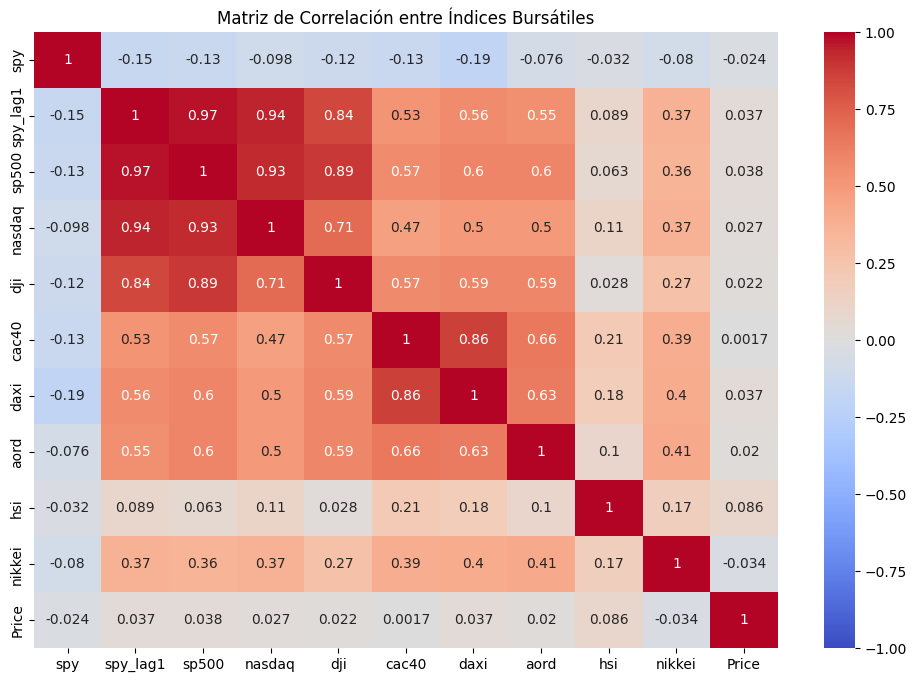


Estadísticas descriptivas:
               spy     spy_lag1        sp500       nasdaq          dji  \
count  1099.000000  1099.000000  1099.000000  1099.000000  1099.000000   
mean      0.277746     0.289936     2.638388    10.672988    13.411720   
std       4.894747     4.896100    46.785653   209.170954   317.366183   
min     -28.419983   -34.479980  -338.350098 -1067.918945 -2218.250000   
25%      -1.964804    -1.897585   -18.815186   -89.285156  -164.018555   
50%       0.455725     0.499815     4.510254    28.120117    20.312500   
75%       2.792419     2.778997    27.974976   129.395020   188.690430   
max      38.729980    38.729980   387.870117  1340.008789  2609.019531   

             cac40         daxi         aord          hsi       nikkei  \
count  1099.000000  1099.000000  1099.000000  1099.000000  1099.000000   
mean      1.660549     6.649438     1.893633   -11.911127    -0.548466   
std      74.154121   191.438701    61.679798   258.254044   303.433068   
min    -7

In [4]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Definir fecha de inicio y fin para los datos
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 años de datos

# Obtener datos de los índices usando yfinance
aord = yf.download('^AORD', start=start_date, end=end_date)
nikkei = yf.download('^N225', start=start_date, end=end_date)
hsi = yf.download('^HSI', start=start_date, end=end_date)
daxi = yf.download('^GDAXI', start=start_date, end=end_date)
cac40 = yf.download('^FCHI', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
dji = yf.download('^DJI', start=start_date, end=end_date)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)
spy = yf.download('SPY', start=start_date, end=end_date)

# Crear el DataFrame con el índice de SPY
indicepanel = pd.DataFrame(index=spy.index)

# Calcular las variaciones como en tu ejemplo original
indicepanel['spy'] = spy['Open'].shift(-1) - spy['Open']
indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)
indicepanel['sp500'] = sp500['Open'] - sp500['Open'].shift(1)
indicepanel['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
indicepanel['dji'] = dji['Open'] - dji['Open'].shift(1)

indicepanel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['daxi'] = daxi['Open'] - daxi['Open'].shift(1)

indicepanel['aord'] = aord['Close'] - aord['Open']
indicepanel['hsi'] = hsi['Close'] - hsi['Open']
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']
indicepanel['Price'] = spy['Open']

# Eliminar filas con valores NaN
indicepanel = indicepanel.dropna()

# Calcular la matriz de correlación
correlation_matrix = indicepanel.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,           # Mostrar los valores numéricos
            cmap='coolwarm',      # Esquema de colores
            vmin=-1, vmax=1,      # Rango de valores
            center=0)             # Centro del mapa de calor
plt.title('Matriz de Correlación entre Índices Bursátiles')
plt.show()

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(indicepanel.describe())

Descargando datos...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Preparando características...

Resultados de la validación cruzada:

Métricas promedio:
Train: R2      0.178576
RMSE    3.743781
MAE     2.768765
dtype: float64
Test: R2      0.061817
RMSE    4.753501
MAE     3.482889
dtype: float64


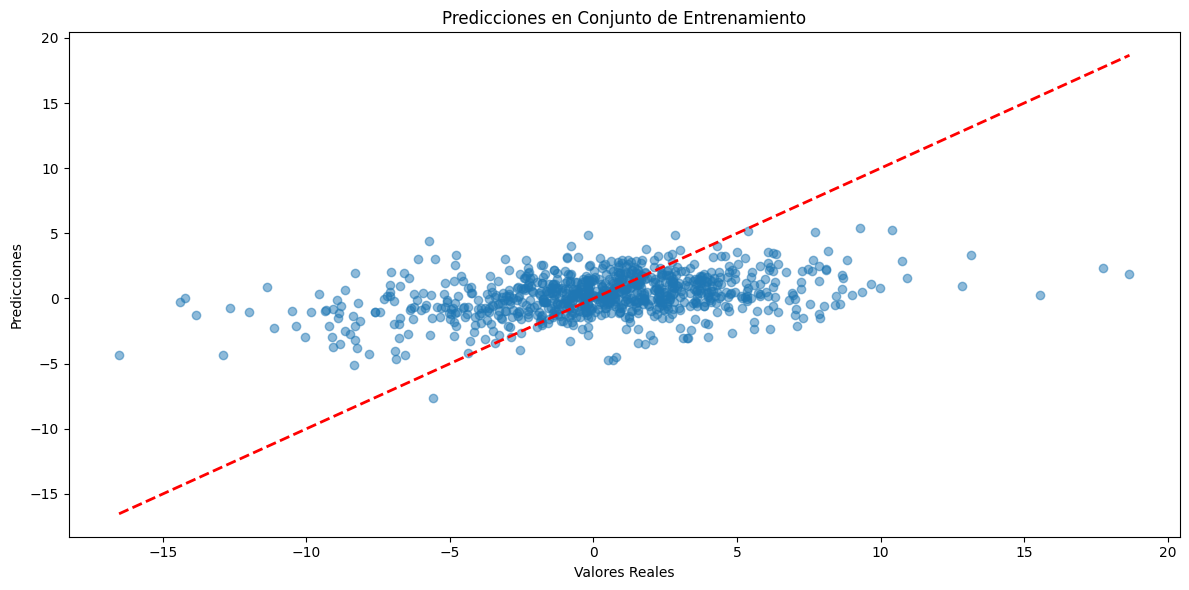

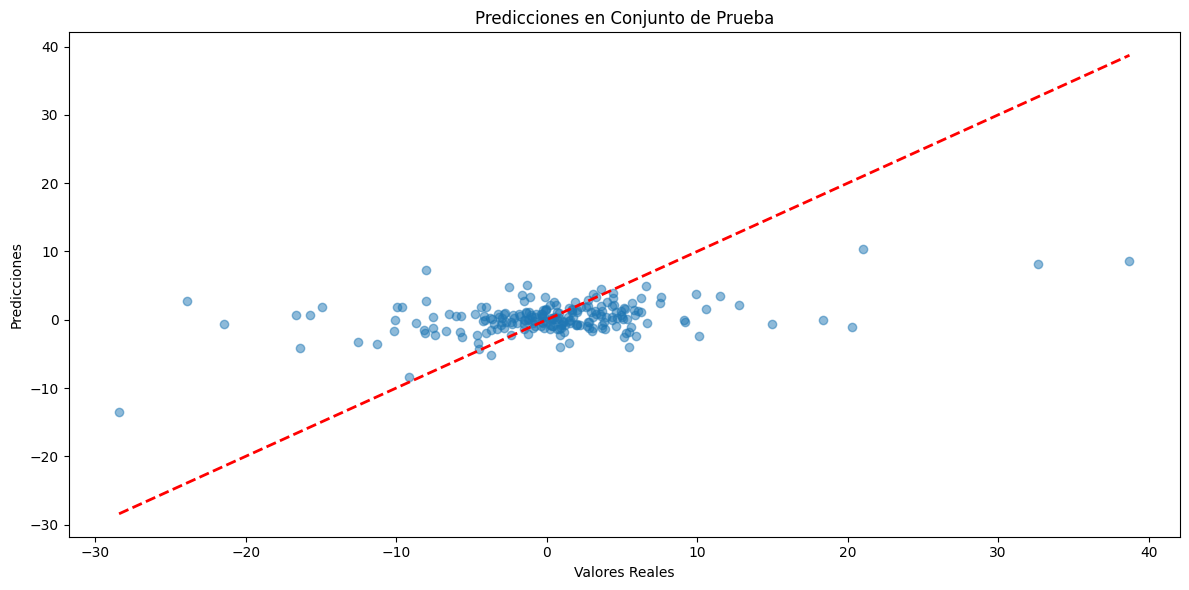

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Descargar datos
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)

def download_market_data():
    symbols = {
        'AORD': '^AORD', 'NIKKEI': '^N225', 'HSI': '^HSI',
        'DAX': '^GDAXI', 'CAC40': '^FCHI', 'SP500': '^GSPC',
        'DJI': '^DJI', 'NASDAQ': '^IXIC', 'SPY': 'SPY'
    }

    data = {}
    for name, symbol in symbols.items():
        data[name] = yf.download(symbol, start=start_date, end=end_date)
    return data

# Preparar los datos
def prepare_features(market_data):
    indicepanel = pd.DataFrame(index=market_data['SPY'].index)

    # Calcular características
    indicepanel['spy'] = market_data['SPY']['Open'].shift(-1) - market_data['SPY']['Open']
    indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)

    # Agregar más características avanzadas
    for market in ['SP500', 'NASDAQ', 'DJI', 'CAC40', 'DAX']:
        # Variación diaria
        indicepanel[f'{market.lower()}_return'] = market_data[market]['Open'] - market_data[market]['Open'].shift(1)
        # Volatilidad rolling
        indicepanel[f'{market.lower()}_volatility'] = market_data[market]['Close'].pct_change().rolling(20).std()
        # Momentum
        indicepanel[f'{market.lower()}_momentum'] = market_data[market]['Close'].pct_change(5)

    # Mercados asiáticos
    for market in ['AORD', 'HSI', 'NIKKEI']:
        indicepanel[f'{market.lower()}_intraday'] = market_data[market]['Close'] - market_data[market]['Open']
        indicepanel[f'{market.lower()}_volatility'] = market_data[market]['Close'].pct_change().rolling(20).std()

    # Agregar características técnicas para SPY
    spy_data = market_data['SPY']
    indicepanel['spy_rsi'] = calculate_rsi(spy_data['Close'])
    indicepanel['spy_ma_cross'] = calculate_ma_cross(spy_data['Close'])

    return indicepanel.dropna()

# Funciones para indicadores técnicos
def calculate_rsi(prices, periods=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_ma_cross(prices):
    ma_short = prices.rolling(window=10).mean()
    ma_long = prices.rolling(window=30).mean()
    return ma_short - ma_long

class MarketPredictor:
    def __init__(self):
        self.pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', LinearRegression())
        ])
        self.feature_cols = None

    def prepare_xy(self, data):
        # Excluir la columna objetivo y columnas no deseadas de las características
        self.feature_cols = [col for col in data.columns
                           if col != 'spy' and not col.startswith('Predicted')]
        X = data[self.feature_cols]
        y = data['spy']
        return X, y

    def fit(self, train_data):
        X_train, y_train = self.prepare_xy(train_data)
        self.pipeline.fit(X_train, y_train)
        return self

    def predict(self, data):
        X = data[self.feature_cols]
        return self.pipeline.predict(X)

    def evaluate(self, data):
        X, y_true = self.prepare_xy(data)
        y_pred = self.pipeline.predict(X)

        metrics = {
            'R2': r2_score(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'MAE': mean_absolute_error(y_true, y_pred)
        }
        return metrics, y_pred

def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Ejecutar el análisis
def run_analysis():
    # Descargar y preparar datos
    print("Descargando datos...")
    market_data = download_market_data()

    print("Preparando características...")
    data = prepare_features(market_data)

    # Split de datos usando TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)

    # Entrenar y evaluar el modelo
    predictor = MarketPredictor()

    results = []
    for train_idx, test_idx in tscv.split(data):
        train_data = data.iloc[train_idx]
        test_data = data.iloc[test_idx]

        predictor.fit(train_data)
        train_metrics, train_pred = predictor.evaluate(train_data)
        test_metrics, test_pred = predictor.evaluate(test_data)

        results.append({
            'train_metrics': train_metrics,
            'test_metrics': test_metrics
        })

    # Mostrar resultados
    print("\nResultados de la validación cruzada:")
    metrics_df = pd.DataFrame(results)
    print("\nMétricas promedio:")
    print("Train:", pd.DataFrame([r['train_metrics'] for r in results]).mean())
    print("Test:", pd.DataFrame([r['test_metrics'] for r in results]).mean())

    # Visualizar resultados finales
    final_predictor = MarketPredictor()
    train_size = int(len(data) * 0.8)
    train_data = data.iloc[:train_size]
    test_data = data.iloc[train_size:]

    final_predictor.fit(train_data)
    _, train_pred = final_predictor.evaluate(train_data)
    _, test_pred = final_predictor.evaluate(test_data)

    plot_results(train_data['spy'], train_pred, 'Predicciones en Conjunto de Entrenamiento')
    plot_results(test_data['spy'], test_pred, 'Predicciones en Conjunto de Prueba')

    return final_predictor

if __name__ == "__main__":
    model = run_analysis()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-7-686121061>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['PredictedY'] = lm.predict(Train)
<ipython-input-7-

Total profit made in Train:  129.26291379470757


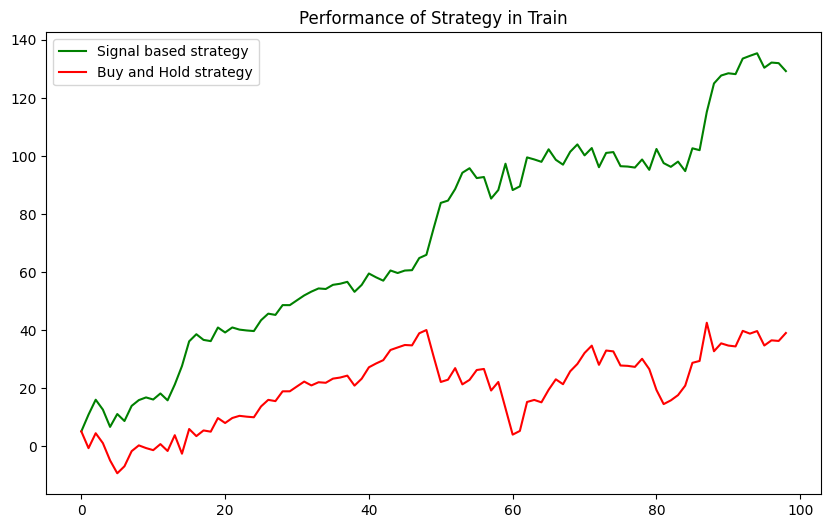

Total profit made in Test:  92.20552846318418


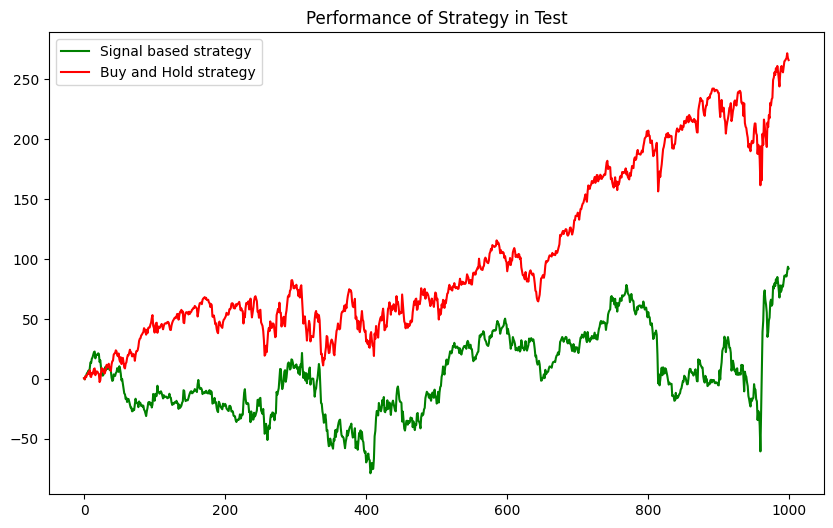

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from datetime import datetime, timedelta

# Descargar datos históricos
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 años de datos

# Descargar datos de índices
aord = yf.download('^AORD', start=start_date, end=end_date)
nikkei = yf.download('^N225', start=start_date, end=end_date)
hsi = yf.download('^HSI', start=start_date, end=end_date)
daxi = yf.download('^GDAXI', start=start_date, end=end_date)
cac40 = yf.download('^FCHI', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
dji = yf.download('^DJI', start=start_date, end=end_date)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)
spy = yf.download('SPY', start=start_date, end=end_date)

# Crear DataFrame para análisis
indicepanel = pd.DataFrame(index=spy.index)

# Calcular variaciones
indicepanel['spy'] = spy['Open'].shift(-1) - spy['Open']
indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)
indicepanel['sp500'] = sp500['Open'] - sp500['Open'].shift(1)
indicepanel['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
indicepanel['dji'] = dji['Open'] - dji['Open'].shift(1)
indicepanel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['daxi'] = daxi['Open'] - daxi['Open'].shift(1)
indicepanel['aord'] = aord['Close'] - aord['Open']
indicepanel['hsi'] = hsi['Close'] - hsi['Open']
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']
indicepanel['Price'] = spy['Open']

# Eliminar filas con valores NaN
indicepanel = indicepanel.dropna()

# Dividir datos en entrenamiento y prueba
Train = indicepanel.iloc[-2000:-1000, :]  # 1000 observaciones para entrenamiento
Test = indicepanel.iloc[-1000:, :]        # 1000 observaciones para prueba

# Crear y ajustar el modelo
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()

# Hacer predicciones
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

# Estrategia de trading
# Para entrenamiento
Train['Order'] = [1 if sig > 0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']
Train['Wealth'] = Train['Profit'].cumsum()

print("Total profit made in Train: ", Train['Profit'].sum())

# Visualizar resultados del entrenamiento
plt.figure(figsize=(10, 6))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# Para prueba
Test['Order'] = [1 if sig > 0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']
Test['Wealth'] = Test['Profit'].cumsum()

print("Total profit made in Test: ", Test['Profit'].sum())

# Visualizar resultados de la prueba
plt.figure(figsize=(10, 6))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

Total profit made in Test:  92.20552846318418


<ipython-input-9-1483947913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
<ipython-input-9-1483947913>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Profit'] = Test['spy'] * Test['Order']
<ipython-input-9-1483947913>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

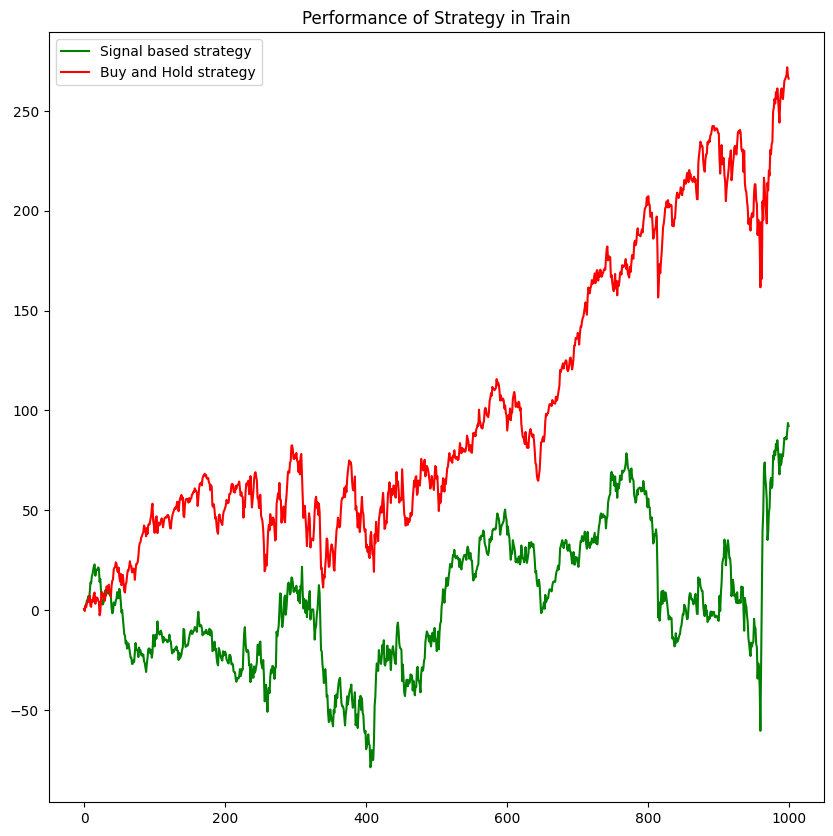

In [9]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-11-121930806>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['PredictedY'] = lm.predict(Train)
<ipython-input-1

Total profit made in Train:  129.26223893586916


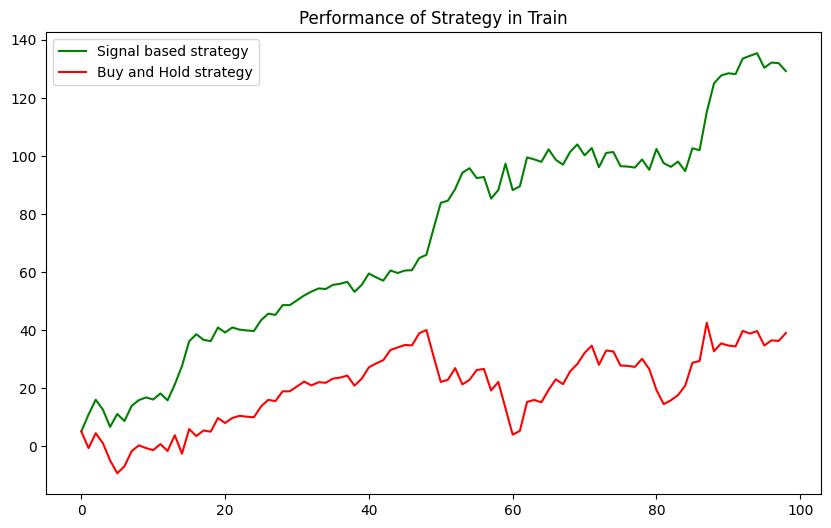

<ipython-input-11-121930806>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Order'] = [1 if sig > 0 else -1 for sig in Test['PredictedY']]
<ipython-input-11-121930806>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Profit'] = Test['spy'] * Test['Order']
<ipython-input-11-121930806>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Total profit made in Test:  92.20491782829413


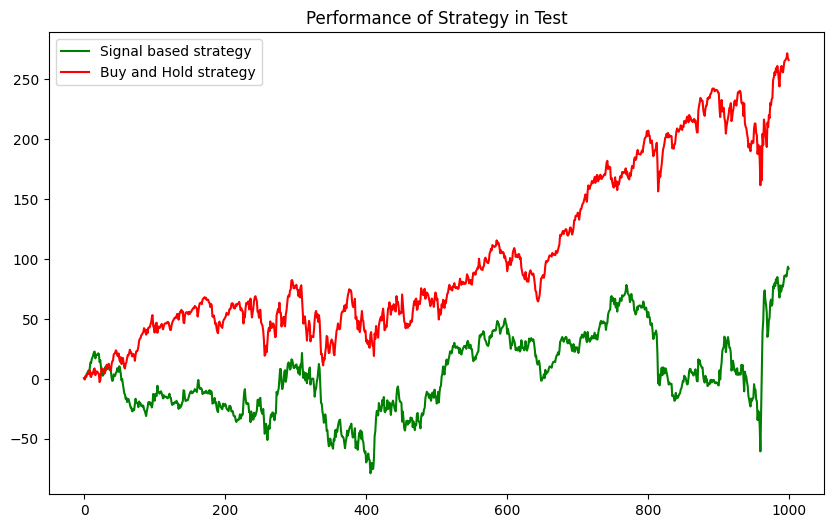

<ipython-input-11-121930806>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
<ipython-input-11-121930806>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']
<ipython-input-11-121930806>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Ratio de Sharpe en Entrenamiento:
Daily Sharpe Ratio is  0.32700649902376505
Yearly Sharpe Ratio is  5.191067241112608

Ratio de Sharpe en Prueba:
Daily Sharpe Ratio is  0.01596976226207629
Yearly Sharpe Ratio is  0.253512116653669

Maximum Drawdown in Train is  -0.030750451223378914
Maximum Drawdown in Test is  -0.3316831687001969


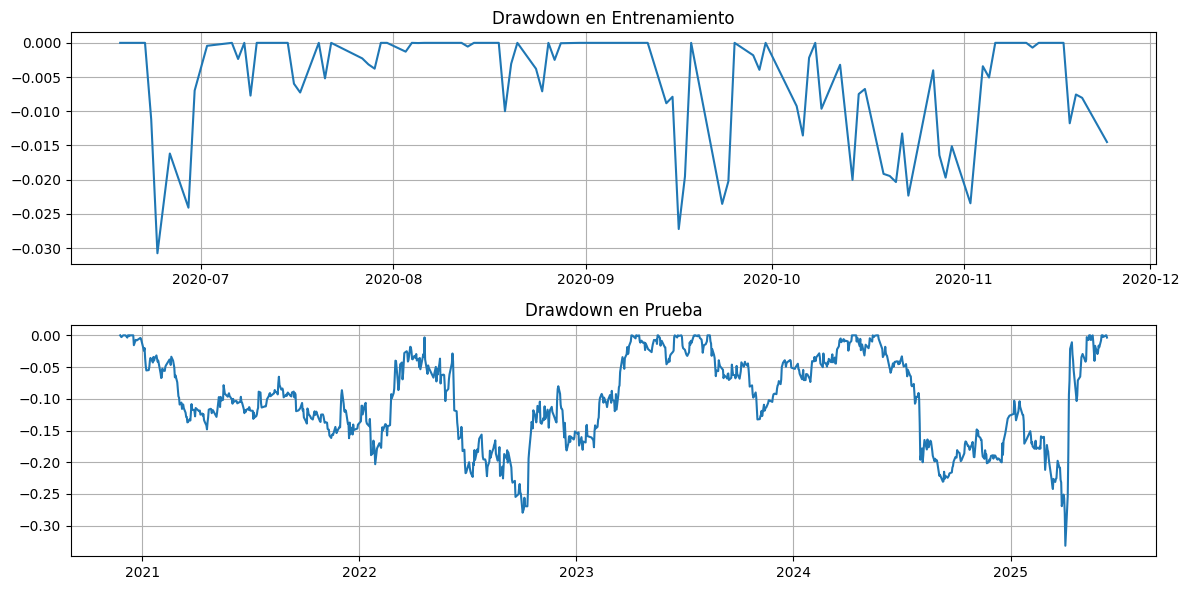

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from datetime import datetime, timedelta

# Descargar datos históricos
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 años de datos

# Descargar datos de índices
aord = yf.download('^AORD', start=start_date, end=end_date)
nikkei = yf.download('^N225', start=start_date, end=end_date)
hsi = yf.download('^HSI', start=start_date, end=end_date)
daxi = yf.download('^GDAXI', start=start_date, end=end_date)
cac40 = yf.download('^FCHI', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
dji = yf.download('^DJI', start=start_date, end=end_date)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)
spy = yf.download('SPY', start=start_date, end=end_date)

# Crear DataFrame para análisis
indicepanel = pd.DataFrame(index=spy.index)

# Calcular variaciones
indicepanel['spy'] = spy['Open'].shift(-1) - spy['Open']
indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)
indicepanel['sp500'] = sp500['Open'] - sp500['Open'].shift(1)
indicepanel['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
indicepanel['dji'] = dji['Open'] - dji['Open'].shift(1)
indicepanel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['daxi'] = daxi['Open'] - daxi['Open'].shift(1)
indicepanel['aord'] = aord['Close'] - aord['Open']
indicepanel['hsi'] = hsi['Close'] - hsi['Open']
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']
indicepanel['Price'] = spy['Open']

# Eliminar filas con valores NaN
indicepanel = indicepanel.dropna()

# Dividir datos en entrenamiento y prueba
Train = indicepanel.iloc[-2000:-1000, :]  # 1000 observaciones para entrenamiento
Test = indicepanel.iloc[-1000:, :]        # 1000 observaciones para prueba

# Crear y ajustar el modelo
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()

# Hacer predicciones
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

# ---- ESTRATEGIA DE TRADING EN ENTRENAMIENTO ----
Train['Order'] = [1 if sig > 0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']
Train['Wealth'] = Train['Profit'].cumsum()
print("Total profit made in Train: ", Train['Profit'].sum())

# Visualizar resultados del entrenamiento
plt.figure(figsize=(10, 6))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# ---- ESTRATEGIA DE TRADING EN PRUEBA ----
Test['Order'] = [1 if sig > 0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']
Test['Wealth'] = Test['Profit'].cumsum()
print("Total profit made in Test: ", Test['Profit'].sum())

# Visualizar resultados de prueba
plt.figure(figsize=(10, 6))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# ---- EVALUACIÓN DEL MODELO - MÉTRICAS DE TRADING ----

# Ajustar la riqueza por el precio inicial
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

# ---- RATIO DE SHARPE EN ENTRENAMIENTO ----
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('\nRatio de Sharpe en Entrenamiento:')
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

# ---- RATIO DE SHARPE EN PRUEBA ----
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('\nRatio de Sharpe en Prueba:')
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

# ---- MAXIMUM DRAWDOWN EN ENTRENAMIENTO ----
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Wealth'] - Train['Peak'])/Train['Peak']
print('\nMaximum Drawdown in Train is ', Train['Drawdown'].min())

# ---- MAXIMUM DRAWDOWN EN PRUEBA ----
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Wealth'] - Test['Peak'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].min())

# ---- VISUALIZACIÓN DE DRAWDOWN ----
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Drawdown en Entrenamiento')
plt.plot(Train['Drawdown'])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('Drawdown en Prueba')
plt.plot(Test['Drawdown'])
plt.grid(True)
plt.tight_layout()
plt.show()

# EVALUACIÓN

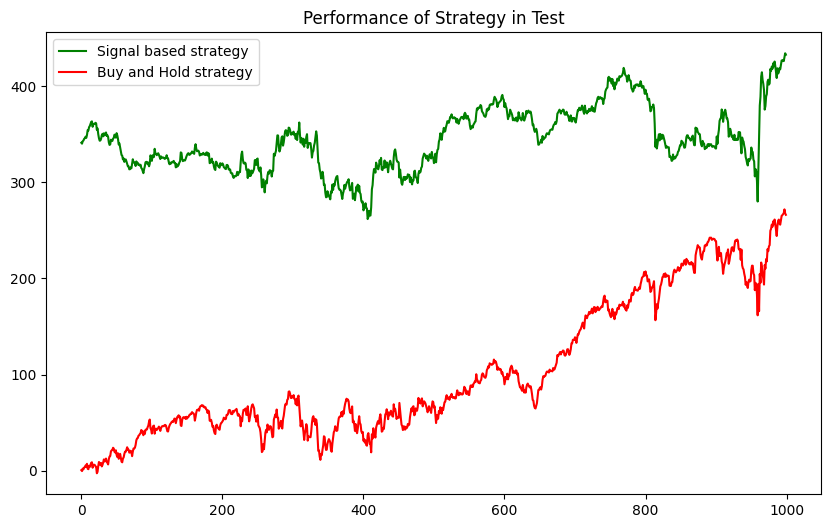

<ipython-input-12-929274215>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
<ipython-input-12-929274215>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']
<ipython-input-12-929274215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Ratio de Sharpe en Entrenamiento:
Daily Sharpe Ratio is  0.32283213321241166
Yearly Sharpe Ratio is  5.1248012382031005

Ratio de Sharpe en Prueba:
Daily Sharpe Ratio is  0.017172826312450967
Yearly Sharpe Ratio is  0.2726101663851098

Maximum Drawdown in Train is  -0.015791975956982715
Maximum Drawdown in Test is  -0.18299000933753065


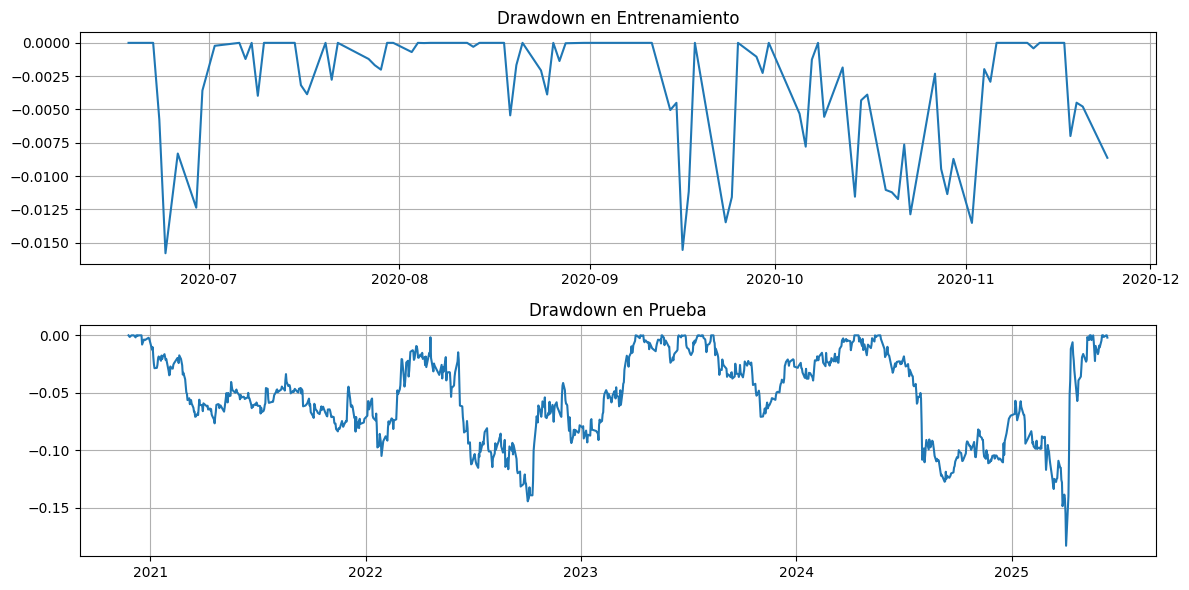

In [12]:

# Visualizar resultados de prueba
plt.figure(figsize=(10, 6))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# ---- EVALUACIÓN DEL MODELO - MÉTRICAS DE TRADING ----

# Ajustar la riqueza por el precio inicial
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

# ---- RATIO DE SHARPE EN ENTRENAMIENTO ----
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('\nRatio de Sharpe en Entrenamiento:')
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

# ---- RATIO DE SHARPE EN PRUEBA ----
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('\nRatio de Sharpe en Prueba:')
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

# ---- MAXIMUM DRAWDOWN EN ENTRENAMIENTO ----
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Wealth'] - Train['Peak'])/Train['Peak']
print('\nMaximum Drawdown in Train is ', Train['Drawdown'].min())

# ---- MAXIMUM DRAWDOWN EN PRUEBA ----
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Wealth'] - Test['Peak'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].min())

# ---- VISUALIZACIÓN DE DRAWDOWN ----
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Drawdown en Entrenamiento')
plt.plot(Train['Drawdown'])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('Drawdown en Prueba')
plt.plot(Test['Drawdown'])
plt.grid(True)
plt.tight_layout()
plt.show()

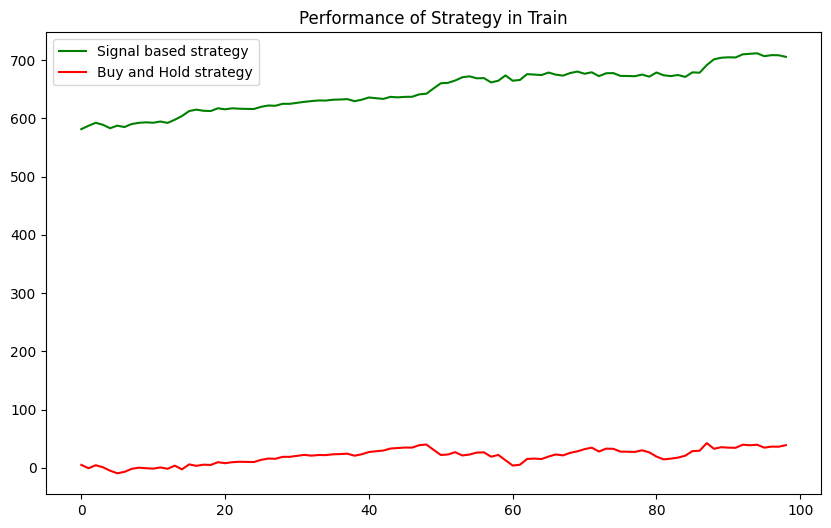

Total profit made in Test:  92.20491782829413


<ipython-input-13-1850292650>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Order'] = [1 if sig > 0 else -1 for sig in Test['PredictedY']]
<ipython-input-13-1850292650>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Profit'] = Test['spy'] * Test['Order']
<ipython-input-13-1850292650>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

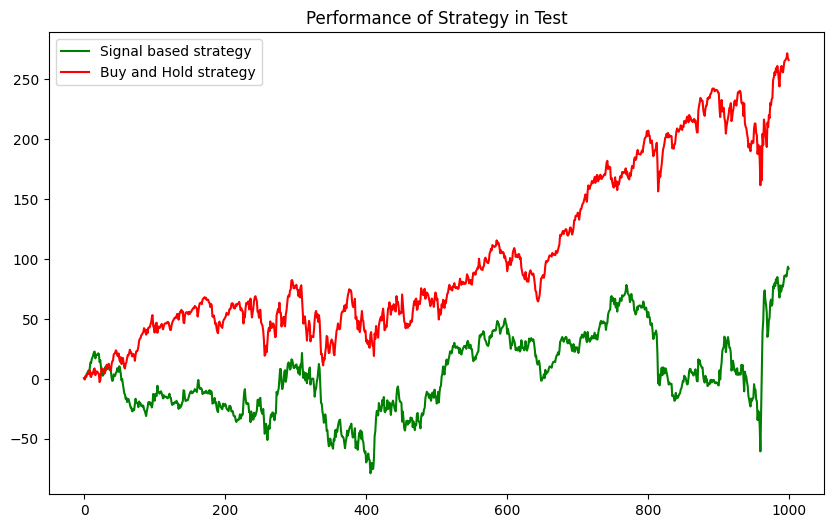

In [13]:
# Visualizar resultados del entrenamiento
plt.figure(figsize=(10, 6))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# ---- ESTRATEGIA DE TRADING EN PRUEBA ----
Test['Order'] = [1 if sig > 0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']
Test['Wealth'] = Test['Profit'].cumsum()
print("Total profit made in Test: ", Test['Profit'].sum())

# Visualizar resultados de prueba
plt.figure(figsize=(10, 6))
plt.title('Performance of Strategy in Test')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()


# CONCEPTOS

### RATIO SHARPE

Es la medida más popular para evaluar el rendimiento ajustado por riesgo
Fórmula: (Rendimiento medio - Tasa libre de riesgo) / Volatilidad
Interpretación:
< 1: Malo (rendimiento pobre considerando el riesgo)
1-2: Aceptable
2-3: Muy bueno
> 3: Excelente

Se anualiza multiplicando por √252 (días de trading en un año)
Un Ratio de Sharpe alto indica mejor rendimiento por unidad de riesgo

### MAXIMUM DRAWDOWN

Mide la máxima pérdida desde un pico histórico
Es un porcentaje que muestra la caída más grande que ha sufrido la estrategia
Interpretación:
-0.1 = caída máxima del 10%
-0.5 = caída máxima del 50%
Cuanto más cercano a 0, mejor
Es crucial para:
Gestión de riesgo
Dimensionamiento de posiciones
Evaluación de la resistencia de la estrategia

### RETORNOS ACUMULADOS

Muestra el crecimiento total del capital
Permite comparar con estrategia "Buy & Hold"
Ayuda a visualizar:
Tendencia general
Consistencia de ganancias
Períodos de pérdidas